In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectFromModel
import numpy as np

In [2]:
symptoms = pd.read_csv('covid_symptoms.csv')

In [4]:
symptoms.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [11]:
symptoms.shape

(316800, 16)

 # Deleting unecessary columns

In [3]:
symptoms.drop(['Country','Contact_Dont-Know','Contact_No','Contact_Yes',
               'None_Sympton','Severity_Severe','Severity_Moderate',
               'Severity_Mild','Gender_Female','Gender_Male',
               'Gender_Transgender'], axis=1, inplace=True)

# setting target and indicators for modeling

In [4]:
#Creating a new column with no data
symptoms['covid_y_n']=None

In [5]:
def get_opposite(x):
    if x == 0:
        return 1
    else:
        return 0

In [6]:
#applying function to get the inverse of Severity_None values to the new column created
symptoms['covid_y_n']=symptoms['Severity_None'].apply(get_opposite)

In [7]:
#Deleting Severity_None column since it is no longer needed 
del symptoms['Severity_None']

In [13]:
#setting the target variable
indicators = symptoms['covid_y_n']

In [9]:
#setting the indicators variable, every column but the target column
target = symptoms.drop('covid_y_n', axis=1)

# Models

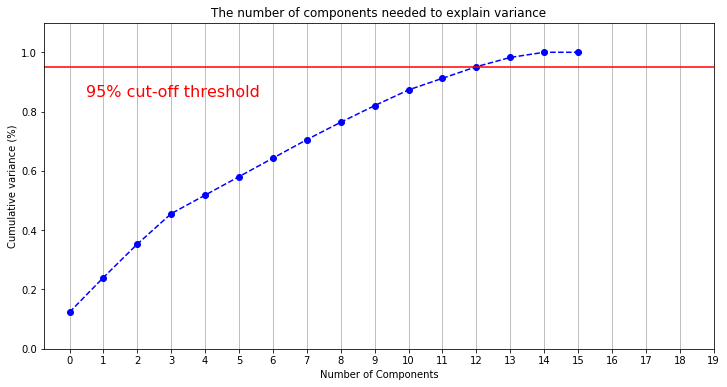

In [10]:
pca = PCA().fit(symptoms)

plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(0, 16, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 20, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [16]:
 x = PCA(n_components = 12).fit_transform(indicators)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(x, target, random_state=42)

In [18]:
#Random Forest Classifier
rfc = RandomForestClassifier().fit(X_train, y_train)
print(f'Random Forest Training Score: {rfc.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {rfc.score(X_test, y_test)}')

print('')
#Logistic Regression
lr = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regresion Training Score: {lr.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {lr.score(X_test, y_test)}')

print('')
#Decison Tree 
DT = DecisionTreeClassifier().fit(X_train, y_train)
print(f'Decision Tree Testing Score: {DT.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {DT.score(X_test, y_test)}')



C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest Training Score: 0.7497979797979798
Random Forest Testing Score: 0.7506060606060606



C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regresion Training Score: 0.7497979797979798
Logistic Regression Testing Score: 0.7506060606060606

Decision Tree Testing Score: 0.7497979797979798
Decision Tree Testing Score: 0.7506060606060606


 # parameter tuning

In [19]:
#Random Forest
rf1 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Training Score: {rf1.score(X_train, y_train)}')
print(f'Testing Score: {rf1.score(X_test, y_test)}')

print('')

#Decison Tree
DT1 = DecisionTreeClassifier(min_samples_leaf=20, random_state=42, criterion="entropy").fit(X_train, y_train)
print(f'Decision Tree Testing Score: {DT1.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {DT1.score(X_test, y_test)}')

#Logistic Regression
LR1 = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regression Training Score: {LR1.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {LR1.score(X_test, y_test)}')

Training Score: 0.7497979797979798
Testing Score: 0.7506060606060606

Decision Tree Testing Score: 0.7497979797979798
Decision Tree Testing Score: 0.7506060606060606


C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Training Score: 0.7497979797979798
Logistic Regression Testing Score: 0.7506060606060606


Using selected Features

In [20]:
# create selection object by passing in the model fitted above
# Note, the original model MUST be one that has a feature_importances_ or coef_
sel = SelectFromModel(rfc)

# Fit selection object to the training set
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=10, n_jobs=None,
                                                 oob_score=False,
                                                 random_state=None, verbose=0,
   

In [21]:
#Logistic Regression
clf = LogisticRegression().fit(X_train, y_train)
print(f'Logistic Regression Training Score: {clf.score(X_train, y_train)}')
print(f'Logistic Regression Testing Score: {clf.score(X_test, y_test)}')

print('')

rfc2 = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train, y_train)
print(f'Random Forest Training Score: {rfc2.score(X_train, y_train)}')
print(f'Random Forest Testing Score: {rfc2.score(X_test, y_test)}')

print('')

DT2 = DecisionTreeClassifier().fit(X_train, y_train)
print(f'Decision Tree Testing Score: {DT2.score(X_train, y_train)}')
print(f'Decision Tree Testing Score: {DT2.score(X_test, y_test)}')

C:\Users\jacke\Downloads\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Training Score: 0.7497979797979798
Logistic Regression Testing Score: 0.7506060606060606

Random Forest Training Score: 0.7497979797979798
Random Forest Testing Score: 0.7506060606060606

Decision Tree Testing Score: 0.7497979797979798
Decision Tree Testing Score: 0.7506060606060606


Even after hyperparameter tuning and using selected features the model score remains the same